<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


#### Install the required libraries and import them


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Connect to the SQLite database


In [3]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [4]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [5]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [6]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [7]:
query = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
comp = pd.read_sql(query, conn)
comp

,CompTotal
0,2040000.0
1,28000.0
2,85000.0
3,50000.0
4,110000.0
...,...
33735,36000.0
33736,40000.0
33737,61000.0
33738,58000.0


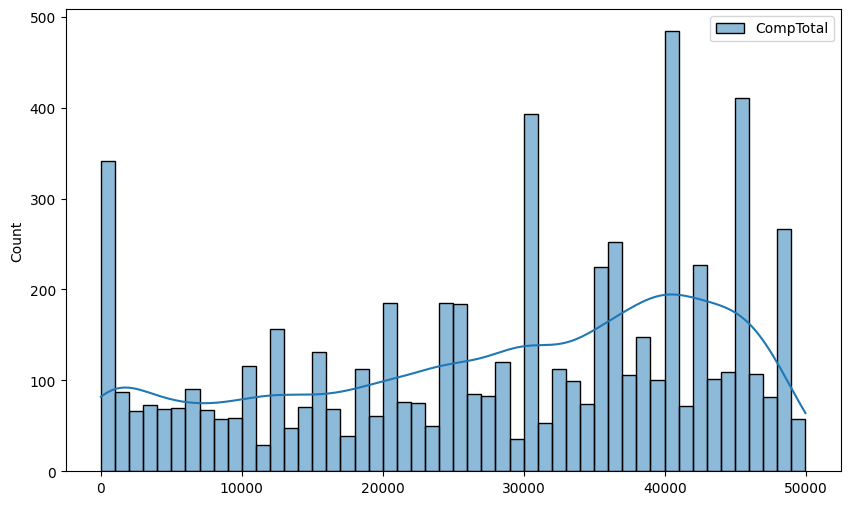

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(comp[comp['CompTotal'] < 50000], bins=50, kde=True)
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [9]:
query = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
"""
years_code = pd.read_sql(query, conn)
years_code.value_counts()

YearsCodePro      
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
27                     380
21                     380
28                     342
35                     285
29                     196
32                     194
40                     194
34                     169
38                     134
33       

In [10]:
def convert_year(year):
    if year == 'Less than 1 year':
        return 0
    elif year == 'More than 50 years':
        return 51
    else:
        try:
            return int(year)
        except:
            return None
years_code['YearsCodePro'] = years_code['YearsCodePro'].apply(convert_year)
years_code.value_counts()

YearsCodePro
2               4168
3               4093
5               3526
10              3251
4               3215
0               2856
6               2843
1               2639
8               2549
7               2517
12              1777
15              1635
20              1549
9               1493
11              1312
13              1127
14              1082
25               998
16               946
18               867
17               814
30               689
24               632
19               516
22               492
23               448
26               426
27               380
21               380
28               342
35               285
29               196
32               194
40               194
34               169
38               134
33               132
36               119
31               106
37               104
45                56
42                55
39                54
41                51
51                50
44                42
43                37


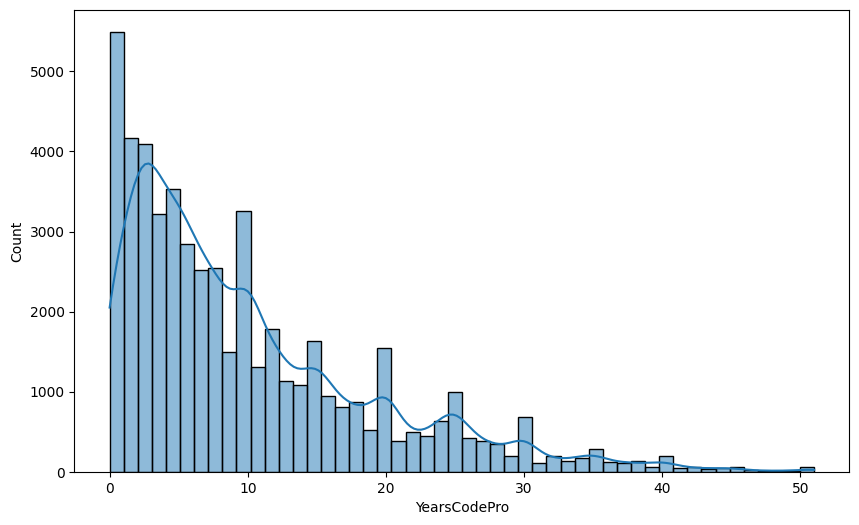

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(years_code['YearsCodePro'], bins=50, kde=True)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [12]:
query = """
SELECT CompTotal, Age
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
age_comp = pd.read_sql(query, conn)
age_comp = age_comp[age_comp['CompTotal'] < 110000]
age_comp

,CompTotal,Age
1,28000.0,25-34 years old
2,85000.0,35-44 years old
3,50000.0,35-44 years old
6,95000.0,45-54 years old
8,35000.0,35-44 years old
...,...,...
33735,36000.0,18-24 years old
33736,40000.0,25-34 years old
33737,61000.0,25-34 years old
33738,58000.0,35-44 years old


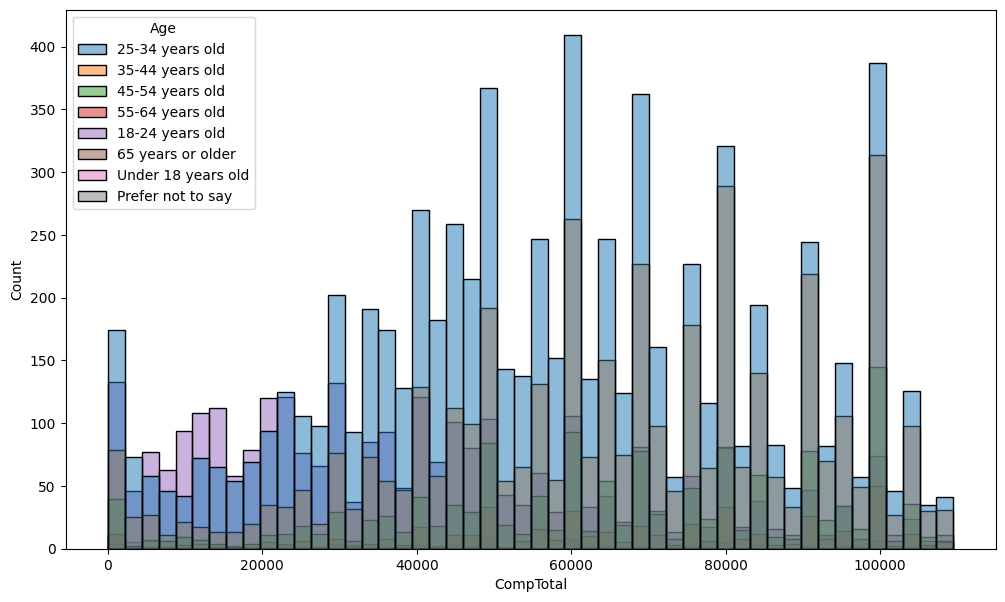

In [13]:
plt.figure(figsize=(12,7))
sns.histplot(data=age_comp, x='CompTotal', hue='Age', bins=50)
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [14]:
query = """
SELECT TimeSearching, Age
FROM main
WHERE TimeSearching IS NOT NULL AND Age IS NOT NULL
"""
time_age = pd.read_sql(query, conn)
time_age['TimeSearching'].value_counts()

TimeSearching
30-60 minutes a day           10951
15-30 minutes a day            7805
60-120 minutes a day           5275
Less than 15 minutes a day     2689
Over 120 minutes a day         2191
Name: count, dtype: int64

In [15]:
def convert_time(x):
    if x == "Less than 15 minutes a day":
        return 0.25
    elif x == "15-30 minutes a day":
        return 0.375 
    elif x == "30-60 minutes a day":
        return 0.75
    elif x == "60-120 minutes a day":
        return 1.5
    elif x == "Over 120 minutes a day":
        return 2
    else:
        return None

time_age["TimeSearchingHours"] = time_age["TimeSearching"].apply(convert_time)
time_age

,TimeSearching,Age,TimeSearchingHours
0,30-60 minutes a day,35-44 years old,0.750
1,30-60 minutes a day,35-44 years old,0.750
2,60-120 minutes a day,45-54 years old,1.500
3,15-30 minutes a day,25-34 years old,0.375
4,Less than 15 minutes a day,25-34 years old,0.250
...,...,...,...
28906,30-60 minutes a day,18-24 years old,0.750
28907,60-120 minutes a day,18-24 years old,1.500
28908,Less than 15 minutes a day,25-34 years old,0.250
28909,15-30 minutes a day,25-34 years old,0.375


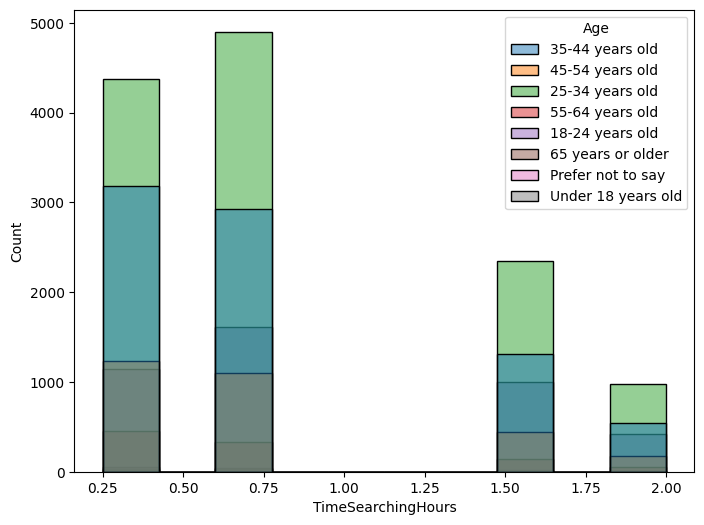

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(data=time_age, x="TimeSearchingHours", hue="Age", bins=10)
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [17]:
query = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWOrkWith IS NOT NULL
"""
data_work = pd.read_sql(query, conn)
data_work

,DatabaseWantToWorkWith
0,PostgreSQL
1,Firebase Realtime Database
2,MongoDB;MySQL;PostgreSQL
3,PostgreSQL;SQLite
4,Cloud Firestore
...,...
42553,Dynamodb
42554,BigQuery;Cassandra;Databricks SQL;DuckDB;Elast...
42555,Elasticsearch;PostgreSQL;Redis
42556,PostgreSQL;SQLite


In [18]:
top = data_work['DatabaseWantToWorkWith'].str.split(';').explode().reset_index(drop=True)
top5 = top.value_counts().head()
top5

DatabaseWantToWorkWith
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64

In [19]:
df_top5 = top5.reset_index()
df_top5


,DatabaseWantToWorkWith,count
0,PostgreSQL,24005
1,SQLite,13489
2,MySQL,12269
3,MongoDB,10982
4,Redis,10847


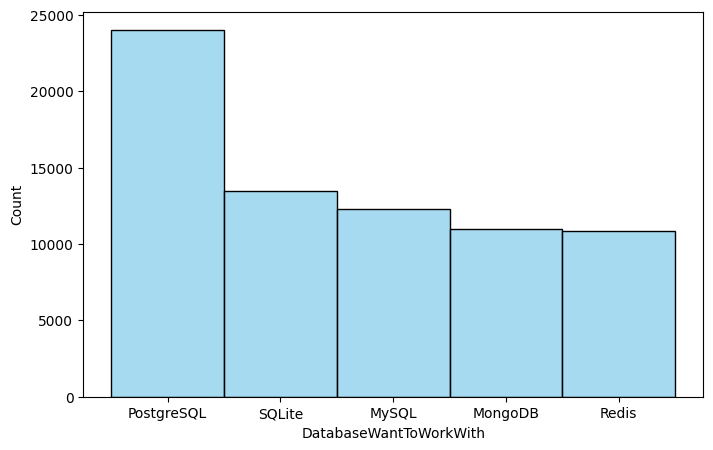

In [20]:
df_top5.columns = ['DatabaseWantToWorkWith', 'Count']

plt.figure(figsize=(8,5))
sns.histplot(data=df_top5, x='DatabaseWantToWorkWith', weights='Count', bins=len(df_top5), color="skyblue")
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [21]:
query = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""
remote = pd.read_sql(query, conn)
remote.value_counts()

RemoteWork                          
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

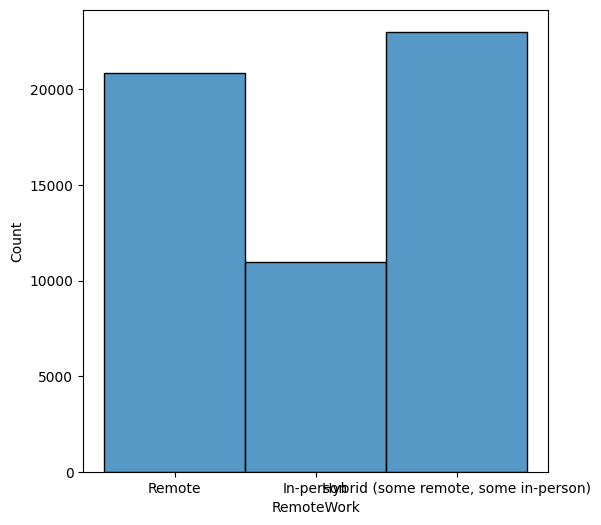

In [22]:
plt.figure(figsize=(6,6))
sns.histplot(data=remote, x='RemoteWork', bins=len(remote['RemoteWork'].unique()))
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [23]:
query = """
SELECT CompTotal, Age
FROM main
WHERE CompTotal IS NOT NULL
"""
comp = pd.read_sql(query, conn)
comp['Age'].value_counts()

Age
25-34 years old       14657
35-44 years old        9352
18-24 years old        4636
45-54 years old        3516
55-64 years old        1279
65 years or older       196
Under 18 years old       90
Prefer not to say        14
Name: count, dtype: int64

In [24]:
mid_career = comp[comp['Age'].isin(['45-54 years old', '55-64 years old'])]
mid_career = mid_career[mid_career['CompTotal'] < 110000]
mid_career

,CompTotal,Age
6,95000.0,45-54 years old
9,54000.0,55-64 years old
15,80000.0,55-64 years old
35,100000.0,45-54 years old
50,102000.0,55-64 years old
...,...,...
33605,60000.0,45-54 years old
33626,100000.0,45-54 years old
33640,80000.0,45-54 years old
33705,40000.0,45-54 years old


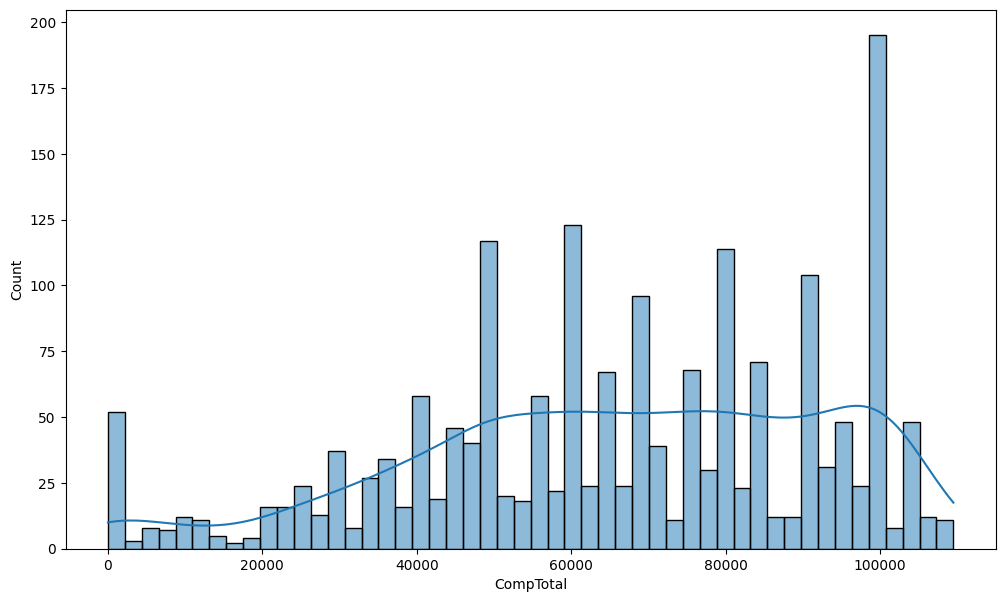

In [25]:
plt.figure(figsize=(12,7))
sns.histplot(data=mid_career, x='CompTotal', bins=50, kde=True)
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [26]:
query = """
SELECT JobSat, YearsCodePro
FROM main
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
"""
job = pd.read_sql(query, conn)
job['YearsCodePro'].value_counts()

YearsCodePro
3                     2261
2                     2153
5                     2016
10                    1918
4                     1866
6                     1725
8                     1588
7                     1533
1                     1173
12                    1111
9                      973
15                     935
20                     819
11                     806
Less than 1 year       780
13                     703
14                     629
16                     577
18                     526
25                     505
17                     481
24                     343
30                     318
19                     312
22                     275
23                     258
26                     243
21                     216
27                     212
28                     170
35                     122
29                     100
32                     100
40                      90
33                      72
34                      72
36             

In [39]:
def group_years(x):
    if x <= 2:
        return "0-2"
    elif x <= 5:
        return "3-5"
    elif x <= 10:
        return "6-10"
    elif x <= 20:
        return "11-20"
    else:
        return "21+"

job['YearsGroup'] = job['YearsCodePro'].apply(group_years)
job

,JobSat,YearsCodePro,YearsGroup
0,8.0,12,11-20
1,5.0,27,21+
2,10.0,10,6-10
3,6.0,0,0-2
4,9.0,18,11-20
...,...,...,...
28351,8.0,17,11-20
28352,5.0,10,6-10
28353,8.0,2,0-2
28354,8.0,7,6-10


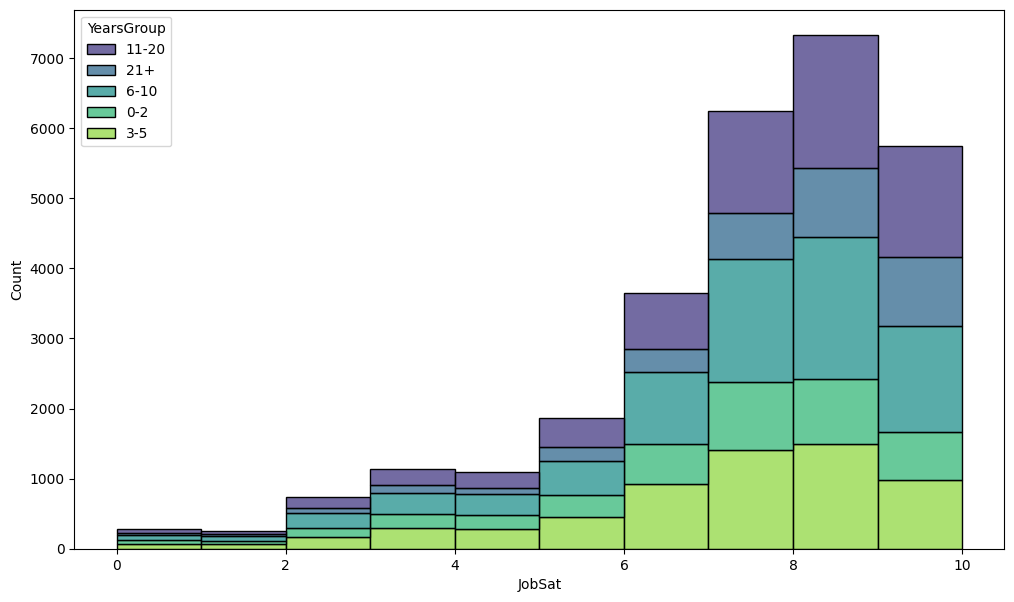

In [41]:
plt.figure(figsize=(12,7))
sns.histplot(data=job,
    x='JobSat',
    hue='YearsGroup',
    bins=10,
    multiple='stack', 
    palette='viridis'
)
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [42]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
